# 6.3 Geographical Visualizations with Python

### 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# Ensures the charts are displayed in the notebook

%matplotlib inline

In [3]:
# Define path

path = r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data'

In [4]:
# Import cleaned data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Data_clean.csv'), index_col = False)

In [5]:
df.head()

Unnamed: 0  incident_id        date           state city_or_county  \
0           0       461105  2013-01-01    Pennsylvania     Mckeesport   
1           1       460726  2013-01-01      California      Hawthorne   
2           2       478855  2013-01-01            Ohio         Lorain   
3           3       478925  2013-01-05        Colorado         Aurora   
4           4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

                            incident_characteristics location_description  \
0  Shot - Wounded/Injured||Mass Shooting (4+ vict...                  NaN   
1  Shot - Wounded/Injured||Shot - Dead (murder, a...                  NaN   
2  Shot - Wounded/Injured||Shot - Dead (murder, a...          Cotton Club   
3  Shot - Dead (murder, accidental, suicide)||Off...                  NaN   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...                  NaN   

   n_guns_involved                                              notes  \
0              NaN  Julian Sims under investigation: Four Shot and...   
1              NaN  Four Shot; One Killed; Unidentified shooter in...   
2              2.0                                                NaN   
3              NaN                                                NaN   
4              2.0  Two firearms recovered. (Attempted) murder sui...   

                     participant_age  \
0                              0::20   
1                              0::20   
2  0::25||1::31||2::33||3::34||4::33   
3         0::29||1::33||2::56||3::33   
4         0::18||1::46||2::14||3::47   

                            participant_gender participant_relationship  \
0         0::Male||1::Male||3::Male||4::Female                      NaN   
1                                      0::Male                      NaN   
2  0::Male||1::Male||2::Male||3::Male||4::Male                      NaN   
3         0::Female||1::Male||2::Male||3::Male                      NaN   
4       0::Female||1::Male||2::Male||3::Female                3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources  
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...  
1  http://losangeles.cbslocal.com/2013/01/01/man-...  
2  http://www.morningjournal.com/general-n

In [6]:
# Remove extra column "Unnamed: 0"

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.shape

(239677, 19)

### 2. Find a JSON/GeoJSON file containing location data 

In [8]:
df['state'].value_counts(dropna = False)

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [9]:
# Import ".json" file for the U.S. 

states = r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data/Original Data/us-states.json'

In [10]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data/Original Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

### 3. Wrangle data set

Wrangled data set in previous excercise, column state matches format of json file

### 4. Clean your data set, watch for missing and extreme values

In [11]:
# Check for missing values

df.isnull().sum()

incident_id                      0
date                             0
state                            0
city_or_county                   0
address                      16497
n_killed                         0
n_injured                        0
incident_url                     0
source_url                     468
incident_characteristics       326
location_description        197588
n_guns_involved              99451
notes                        81017
participant_age              92298
participant_gender           36362
participant_relationship    223903
participant_status           27626
participant_type             24863
sources                        609
dtype: int64

In [12]:
df['n_guns_involved'].value_counts(dropna = False)

1.0      127548
NaN       99451
2.0        7477
3.0        2021
4.0         871
          ...  
158.0         1
189.0         1
85.0          1
96.0          1
127.0         1
Name: n_guns_involved, Length: 107, dtype: int64

In [13]:
df.describe()

incident_id       n_killed      n_injured  n_guns_involved
count  2.396770e+05  239677.000000  239677.000000    140226.000000
mean   5.593343e+05       0.252290       0.494007         1.372442
std    2.931287e+05       0.521779       0.729952         4.678202
min    9.211400e+04       0.000000       0.000000         1.000000
25%    3.085450e+05       0.000000       0.000000         1.000000
50%    5.435870e+05       0.000000       0.000000         1.000000
75%    8.172280e+05       0.000000       1.000000         1.000000
max    1.083472e+06      50.000000      53.000000       400.000000

In [14]:
# Will impute missing value for guns with mean of 1

df['n_guns_involved'].fillna(df['n_guns_involved'].median(), inplace=True)

In [15]:
df['n_guns_involved'].value_counts(dropna = False)

1.0      226999
2.0        7477
3.0        2021
4.0         871
5.0         435
          ...  
158.0         1
189.0         1
85.0          1
96.0          1
127.0         1
Name: n_guns_involved, Length: 106, dtype: int64

In [16]:
df.shape

(239677, 19)

##### Extreme values check

<AxesSubplot:xlabel='n_killed', ylabel='Count'>

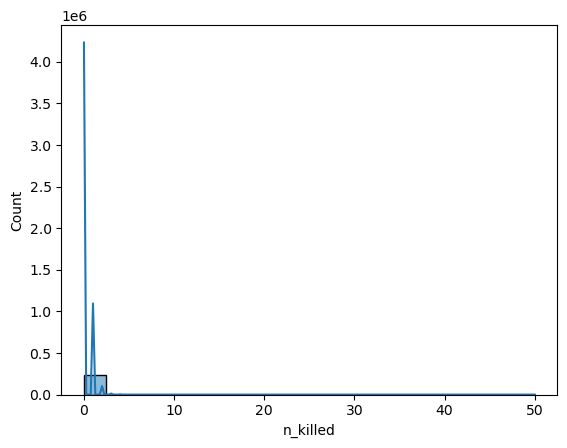

In [17]:
sns.histplot(df['n_killed'], bins=20, kde = True) 

In [18]:
# Check how many extreme values for n_killed

df[df['n_killed'] >10]

incident_id        date                 state  \
194          480366  2013-09-16  District of Columbia   
101531       456893  2015-12-02            California   
130448       577157  2016-06-12               Florida   
217151       980577  2017-11-05                 Texas   
232745      1049217  2018-02-14               Florida   

                  city_or_county                     address  n_killed  \
194         Washington Navy Yard         1336 Isaac Hull Ave        11   
101531            San Bernardino  1365 South Waterman Avenue        16   
130448                   Orlando        1912 S Orange Avenue        50   
217151        Sutherland Springs                  216 4th St        27   
232745  Pompano Beach (Parkland)         5901 Pine Island Rd        17   

        n_injured                                       incident_url  \
194             3  http://www.gunviolencearchive.org/incident/480366   
101531         19  http://www.gunviolencearchive.org/incident/456893   
130448         53  http://www.gunviolencearchive.org/incident/577157   
217151         20  http://www.gunviolencearchive.org/incident/980577   
232745         17  http://www.gunviolencearchive.org/incident/104...   

                                               source_url  \
194     https://www.washingtonpost.com/local/police-se...   
101531  http://www.latimes.com/local/lanow/la-me-ln-sa...   
130448  https://www.reuters.com/article/us-orlando-sho...   
217151  http://abc7.com/full-list-of-texas-church-shoo...   
232745  http://www.orlandosentinel.com/news/fl-florida...   

                                 incident_characteristics  \
194     Shot - Wounded/Injured||Shot - Dead (murder, a...   
101531  Shot - Wounded/Injured||Shot - Dead (murder, a...   
130448  Shot - Wounded/Injured||Shot - Dead (murder, a...   
217151  Shot - Wounded/Injured||Shot - Dead (murder, a...   
232745  Shot - Wounded/Injured||Shot - Dead (murder, a...   

                        location_description  n_guns_involved  \
194                      NAVSEA Building 197              2.0   
101531                Inland Regional Center              4.0   
130448                                 Pulse              2.0   
217151                  First Baptist Church              4.0   
232745  Marjory Stoneman Douglas High School              2.0   

                                                    notes  \
194     Male victim shot in the leg, first female vict...   
101531  Second Location [police v shooter] 1700 block ...   
130448  Names are coming in sporadically and every eff...   
217151  open fire during church service, intend dv, fo...   
232745  Freshman Building, legal S&W M&P 15 and multip...   

                                          participant_age  \
194     0::59||1::53||2::51||3::53||4::62||5::73||6::5...   
101531  0::42||1::58||2::52||3::37||4::40||5::27||6::4...   
130448  0::34||1::23||2::20||3::22||4::36||5::22||6::2...   
217151  0::14||1::7||2::5||3::30||4::58||5::60||6::36|...   
232745  0::35||1::14||2::17||3::37||4::14||5::15||6::4...   

                                       participant_gender  \
194     0::Male||1::Male||2::Male||3::Female||4::Femal...   
101531  0::Male||1::Male||3::Male||4::Male||5::Female|...   
130448  0::Male||1::Male||2::Male||3::Male||4::Male||5...   
217151  0::Female||1::Female||2::Female||3::Female||4:...   
232745  0::Male||1::Male||2::Male||3::Male||4::Female|...   

       participant_relationship  \
194               15::Co-worker   
101531                      NaN   
130448                      NaN   
217151                      NaN   
232745                      NaN   

                                       participant_status  \
194     0::Killed||1::Killed||2::Killed||3::Killed||4:...   
101531  0::Killed||1::Killed||2::Killed||3::Killed||4:...   
130448  0::Killed||1::Killed||2::Killed||3::Killed||4:...   
217151  0::Killed||1::Killed||2::Killed||3::Killed||4:...   
232745  0::Killed||1::Killed||2::Killed||3::K

Confirmed all the incidents are correct

<AxesSubplot:xlabel='n_injured', ylabel='Count'>

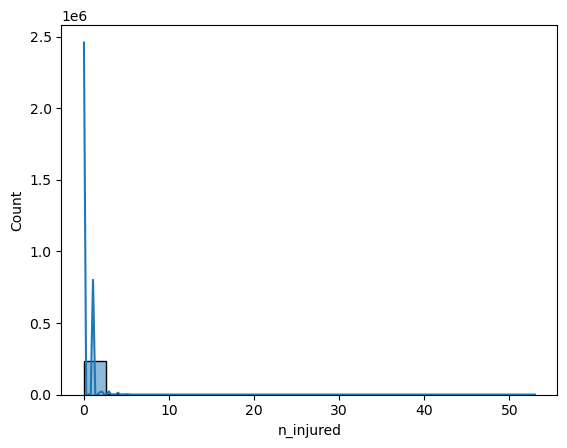

In [19]:
# Check how many extreme values for n_injured
sns.histplot(df['n_injured'], bins=20, kde = True) 

In [20]:
df[df['n_injured'] > 10]

incident_id        date                 state  \
34           482771  2013-03-11  District of Columbia   
73           486209  2013-05-12             Louisiana   
200          480521  2013-09-19              Illinois   
213          480765  2013-10-05            California   
239          493842  2013-11-09                 Texas   
6831         108626  2014-02-20               Florida   
11566        121031  2014-04-02                 Texas   
39222        197384  2014-09-28               Florida   
70511        341622  2015-05-17                 Texas   
75905        361212  2015-06-20              Michigan   
75984        361198  2015-06-20          Pennsylvania   
83892        390774  2015-08-08              Arkansas   
100149       451495  2015-11-22             Louisiana   
101531       456893  2015-12-02            California   
113601       511436  2016-02-25                Kansas   
130448       577157  2016-06-12               Florida   
135757       604233  2016-07-16            California   
137328       611479  2016-07-25               Florida   
142107       634787  2016-08-21           Connecticut   
151406       676663  2016-10-15            California   
178245       803054  2017-03-26                  Ohio   
189725       853901  2017-05-28               Alabama   
195845       879953  2017-07-01              Arkansas   
217151       980577  2017-11-05                 Texas   
218580       987611  2017-11-14            California   
229405      1033262  2018-01-23              Kentucky   
232745      1049217  2018-02-14               Florida   

                  city_or_county  \
34                    Washington   
73                   New Orleans   
200                      Chicago   
213                       Fresno   
239                      Cypress   
6831            Saint Petersburg   
11566                  Fort Hood   
39222                      Miami   
70511                       Waco   
75905                    Detroit   
75984               Philadelphia   
83892                Blytheville   
100149               New Orleans   
101531            San Bernardino   
113601                   Hesston   
130448                   Orlando   
135757               Bakersfield   
137328                Fort Myers   
142107                Bridgeport   
151406               Los Angeles   
178245                Cincinnati   
189725               Phenix City   
195845               Little Rock   
217151        Sutherland Springs   
218580                   Corning   
229405                    Benton   
232745  Pompano Beach (Parkland)   

                                             address  n_killed  n_injured  \
34                         1200 North Capitol Street         0         13   
73                                  Frenchmen Street         0         19   
200                                   1809 W 50th St         0         12   
213                               3883 E. Calwa #114         1         12   
239              7300 block of Enchanted Creek Drive         2         16   
6831                                             NaN         0         12   
11566   Motor Pool Road and Tank Destroyer Boulevard         4         16   
39222                  NW 7th Ave and NW 64th Street         0         15   
70511                        4671 S Jack Kultgen Fwy         9         18   
75905                                Dexter and Webb         1         11   
75984                     4100 block of Ogden Street         0         11   
83892                            833 Anderson Street         1         11   
100149                  1900 block of Gallier Street         0         17   
101531                    1365 South Waterman Avenue        16         19   
113601                                200 S Ridge Rd         4         14   
130448                          1912 S Orange Avenue        50         53   
135757                            621 Stephens Drive         1         14   
137328          

Outliers but all sources are correct

<AxesSubplot:xlabel='n_guns_involved', ylabel='Count'>

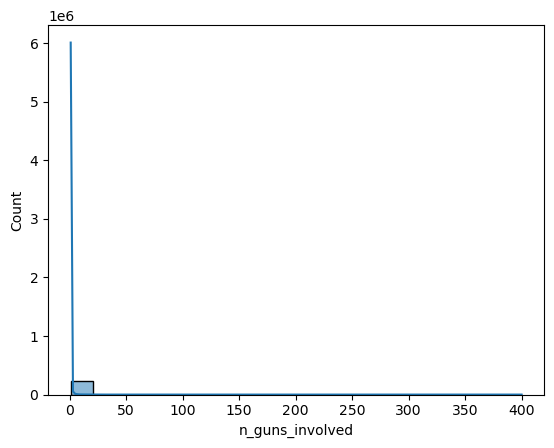

In [21]:
# Check for extreme values in n_guns_involved

sns.histplot(df['n_guns_involved'], bins=20, kde = True) 

In [22]:
df[df['n_guns_involved'] >10]

incident_id        date                 state  \
7607         110715  2014-02-27           Mississippi   
9022         114624  2014-03-13               Alabama   
15077        318444  2014-04-29            Washington   
15153        136646  2014-04-30              New York   
16317        133300  2014-05-09              Illinois   
...             ...         ...                   ...   
238132      1075945  2018-03-21              New York   
238154      1075968  2018-03-21          Pennsylvania   
238676      1078424  2018-03-25              New York   
238896      1078012  2018-03-26  District of Columbia   
239306      1081561  2018-03-29              Colorado   

                  city_or_county                      address  n_killed  \
7607                  Diberville          4515 Popps Ferry Rd         0   
9022                      Killen                   4801 US-43         0   
15077                 Mill Creek                          NaN         0   
15153   New York (New York City)                          NaN         0   
16317                    Chicago  6100 South Lafayette Avenue         0   
...                          ...                          ...       ...   
238132                Wellsville                2953 Hawks Rd         0   
238154                   Reading                  318 Wood St         0   
238676           Corona (Queens)           137-37 Mulberry St         0   
238896                Washington              300 Indiana Ave         0   
239306                    Pueblo           617 W Northern Ave         0   

        n_injured                                       incident_url  \
7607            0  http://www.gunviolencearchive.org/incident/110715   
9022            0  http://www.gunviolencearchive.org/incident/114624   
15077           0  http://www.gunviolencearchive.org/incident/318444   
15153           0  http://www.gunviolencearchive.org/incident/136646   
16317           0  http://www.gunviolencearchive.org/incident/133300   
...           ...                                                ...   
238132          0  http://www.gunviolencearchive.org/incident/107...   
238154          0  http://www.gunviolencearchive.org/incident/107...   
238676          0  http://www.gunviolencearchive.org/incident/107...   
238896          0  http://www.gunviolencearchive.org/incident/107...   
239306          0  http://www.gunviolencearchive.org/incident/108...   

                                               source_url  \
7607    http://www.ksla.com/story/28585972/man-indicte...   
9022    http://www.waff.com/story/27491769/man-accused...   
15077   http://www.heraldnet.com/article/20140924/NEWS...   
15153   http://www.dnainfo.com/new-york/20150827/clint...   
16317   http://wgntv.com/2014/05/09/assault-rifles-sto...   
...                                                   ...   
238132  http://wivb.com/2018/03/23/multiple-guns-stole...   
238154  http://www.lehighvalleylive.com/news/index.ssf...   
238676  http://nypdnews.com/2018/04/police-officers-se...   
238896  https://mpdc.dc.gov/release/mpd%E2%80%99s-week...   
239306  https://www.chieftain.com/news/crime/pueblo-sh...   

                                 incident_characteristics  \
7607    Institution/Group/Business||Non-Shooting Incid...   
9022    Institution/Group/Business|Non-Shooting Incide...   
15077   Non-Shooting Incident||Drug involvement||ATF/L...   
15153   Non-Shooting Incident||ATF/LE Confiscation/Rai...   
16317   Institution/Group/Business||Non-Shooting Incid...   
...                                                   ...   
238132  Institution/Group/Business||Non-Shooting Incid...   
238154  Non-Shooting Incident||Non-Aggression Incident...   
238676  Shots Fired - No Injuries||Under the influence...   
238896  Non-Shooting Incident||ATF/LE Confiscation/Rai...   
239306  Non-Shooting Incident||Drug involvement||ATF/L...   

                    location_description  n_guns_involved  \
7607                     Cook'

In [27]:
df[(df['n_injured'] == 0) & (df['n_killed'] ==0)]

incident_id        date       state            city_or_county  \
278           95289  2014-01-01    Michigan                  Muskegon   
279           92401  2014-01-01  New Jersey                    Newark   
285           94205  2014-01-01    Kentucky                 Lexington   
289           94154  2014-01-01    Virginia                   Hampton   
291          104022  2014-01-01    Maryland                 Baltimore   
...             ...         ...         ...                       ...   
239655      1082089  2018-03-31  California                 San Diego   
239657      1082394  2018-03-31  California                   Shafter   
239669      1082990  2018-03-31   Wisconsin                   Madison   
239671      1082061  2018-03-31  Washington  Spokane (Spokane Valley)   
239672      1083142  2018-03-31   Louisiana                     Rayne   

                                     address  n_killed  n_injured  \
278              300 block of Monroe Avenue          0          0   
279                           Central Avenue         0          0   
285                Kenton and Fourth streets         0          0   
289     West Queen Street and Stewart Street         0          0   
291                2100 block of Tucker Lane         0          0   
...                                      ...       ...        ...   
239655                       8660 Miramar Rd         0          0   
239657             300 block of Atlantic Ave         0          0   
239669                              Hayes Rd         0          0   
239671      12600 block of N Willow Crest Ln         0          0   
239672    North Riceland Road and Highway 90         0          0   

                                             incident_url  \
278      http://www.gunviolencearchive.org/incident/95289   
279      http://www.gunviolencearchive.org/incident/92401   
285      http://www.gunviolencearchive.org/incident/94205   
289      http://www.gunviolencearchive.org/incident/94154   
291     http://www.gunviolencearchive.org/incident/104022   
...                                                   ...   
239655  http://www.gunviolencearchive.org/incident/108...   
239657  http://www.gunviolencearchive.org/incident/108...   
239669  http://www.gunviolencearchive.org/incident/108...   
239671  http://www.gunviolencearchive.org/incident/108...   
239672  http://www.gunviolencearchive.org/incident/108...   

                                               source_url  \
278     http://www.mlive.com/news/muskegon/index.ssf/2...   
279     http://www.nj.com/essex/index.ssf/2014/01/newa...   
285     http://www.lex18.com/news/police-searching-for...   
289     http://www.dailypress.com/news/crime/dp-hampto...   
291     http://www.wbaltv.com/news/maryland/baltimore-...   
...                                                   ...   
239655  https://www.nbcsandiego.com/news/local/Suspect...   
239657  http://www.bakersfield.com/news/breaking/none-...   
239669  https://www.channel3000.com/news/crime/couple-...   
239671  https://www.kxly.com/news/domestic-violence-su...   
239672  http://www.klfy.com/news/local/rayne-woman-cha...   

                                 incident_characteristics  \
278                             Shots Fired - No Injuries   
279                             Officer Involved Incident   
285     Shots Fired - No Injuries||Drive-by (car to st...   
289     Armed robbery with injury/death and/or evidenc...   
291     Armed robbery with injury/death and/or evidenc...   
...                                                   ...   
239655  Institution/Group/Business||Shots Fired - No I...   
239657  Shots Fired - No Injuries||Officer Involved In...   
239669                          Shots Fired - No Injuries   
239671  Non-Shooting Incident||Possession (gun(s) foun...   
239672                          Shots Fired - No Injuries   

                location_description  n_guns_involved  \
278                              NaN          

Will remove rows that have 0 for n_killed and 0 for n_injured as they are just incidents were guns were stolen and no gun violence incident was taken

In [30]:
# Clean data for no gun violence incidents

df3 = df.loc[~((df['n_injured']  == 0) & (df['n_killed'] == 0))]

In [31]:
df3.shape

(142390, 19)

### 5. Create a choropleth map using a variable of your choice

In [40]:
# Create a data frame with just the states and the incident_id

data_to_plot = df3[['state', 'n_killed']]
data_to_plot.head()

state  n_killed
0    Pennsylvania         0
1      California         1
2            Ohio         1
3        Colorado         4
4  North Carolina         2

In [38]:
data_to_plot.shape

(142390, 2)

In [41]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = states, 
    data = data_to_plot,
    columns = ['state', 'n_killed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "deaths").add_to(map)
folium.LayerControl().add_to(map)

map

### 6. Discuss the results

The analysis does answer my question relating to deaths per states, there are certain states that have higher death counts than other states